In [8]:
import keras
from src.utilities import load_data_as_set_of_particles
from src.Models.ParticleCloud import ParticleCloud
from src.Models.MLP import MLP
from src import utilities

#### Loading Data

In [2]:
# Creating the trainning, validation and test set
X_train, y_train = load_data_as_set_of_particles("../Data/HiggsTrainning.csv")
X_val, y_val = load_data_as_set_of_particles("../Data/HiggsValidation.csv")
X_test, y_test = load_data_as_set_of_particles("../Data/HiggsTest.csv")

#### Defining the Model

In [13]:
# Defining the MLP that will be used for all the edges in the cloud
input_mlp = keras.layers.Input(shape=[14])
mlp = MLP(num_neurons=32)
mlp_model = keras.Model(inputs=input_mlp, outputs=mlp(input_mlp))

# creating the ParticleCloud model
input_particle_cloud = keras.layers.Input(shape=[6, 7])
particle_cloud = ParticleCloud(mlp_model)(input_particle_cloud)
output_layer = keras.layers.Dense(2, activation='softmax')(particle_cloud)

# final model
model = keras.Model(inputs=input_particle_cloud, outputs=output_layer)
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 6, 7)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ particle_cloud_1                │ (None, 64)             │         9,248 │
│ (ParticleCloud)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,378 (36.63 KB)

 Trainable params: 9,186 (35.88 KB)

 Non-trainable params: 192 (768.00 B)

In [14]:
model.compile(optimizer='adam', loss='crossentropy', metrics=['accuracy'])
early_stopping = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5585 - loss: 0.6803 - val_accuracy: 0.6119 - val_loss: 0.6512
Epoch 2/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 892us/step - accuracy: 0.6104 - loss: 0.6519 - val_accuracy: 0.6269 - val_loss: 0.6388
Epoch 3/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 889us/step - accuracy: 0.6249 - loss: 0.6430 - val_accuracy: 0.6386 - val_loss: 0.6333
Epoch 4/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 951us/step - accuracy: 0.6355 - loss: 0.6342 - val_accuracy: 0.6403 - val_loss: 0.6279
Epoch 5/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 957us/step - accuracy: 0.6442 - loss: 0.6272 - val_accuracy: 0.6492 - val_loss: 0.6212
Epoch 6/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 907us/step - accuracy: 0.6508 - loss: 0.6241 - val_accuracy: 0.6601 - val_loss: 0.6168
Epoch 7/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 915us/step - accuracy: 0.6567 - loss: 0.6160 - val_accuracy: 0.6568 - val_loss: 0.6149
Epoch 8/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 888us/step - accuracy: 0.

#### Quick Checks

In [15]:
# perfoming the prediction
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 361us/step
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
626/626 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step


In [16]:
print("Trainnig set:")
utilities.display_metrics(y_true=y_train, y_pred=y_train_pred)
print("Validation set:")
utilities.display_metrics(y_true=y_val, y_pred=y_val_pred)
print("Test set:")
utilities.display_metrics(y_true=y_test, y_pred=y_test_pred)

Trainnig set:
Recall: 0.6223
Precision: 0.7141
Confusion Matrix:
[[26263  7527]
 [11410 18800]]
Validation set:
Recall: 0.5953
Precision: 0.6841
Confusion Matrix:
[[6364 2078]
 [3059 4499]]
Test set:
Recall: 0.5968
Precision: 0.6839
Confusion Matrix:
[[8009 2593]
 [3790 5609]]


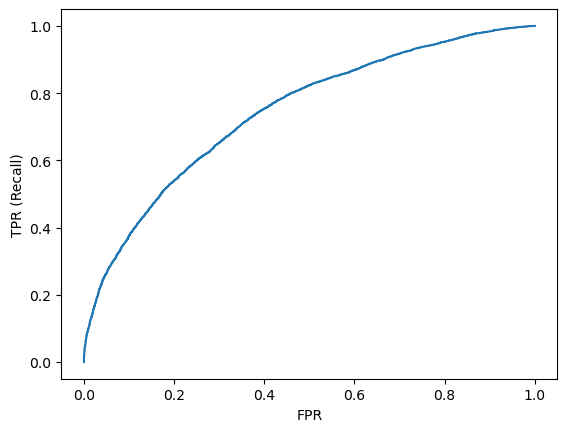

AUC: 0.7441


In [17]:
utilities.display_roc_curve(y_true=y_val, y_pred=y_val_pred)

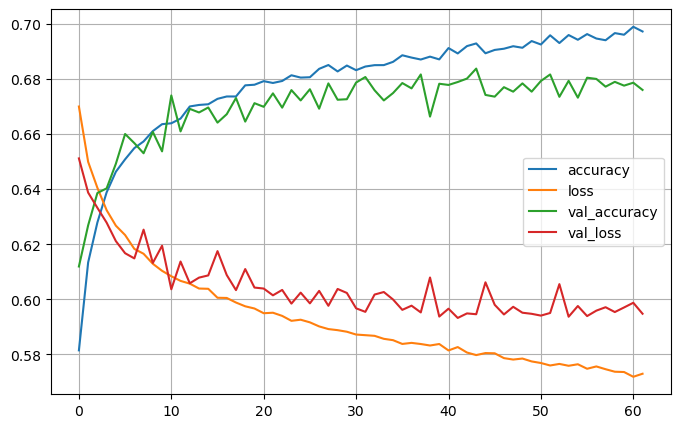

In [18]:
utilities.plot_hist_trainning(history)

In [20]:
utilities.save_model(model, history, "ModelFiles/ParticleCloud")